In [ ]:
!pip install yfinance
!pip install backtrader
!pip install pandas
!pip install matplotlib
!pip install numpy
!pip install datetime
!pip install vectorbt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 419.5/419.5 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.8/259.8 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.8/527.8 kB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.5/315.5 kB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 47.8 MB/s eta 0:00:00


In [ ]:
import yfinance as yf
import backtrader as bt
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import vectorbt as vbt
import math

In [ ]:
data=yf.download('BTC-USD', start='2021-01-01', end='2022-01-01', auto_adjust=True)
data.columns=data.columns.get_level_values(0)
data.columns=data.columns.str.lower()
data = bt.feeds.PandasData(dataname=data)

[*********************100%***********************]  1 of 1 completed


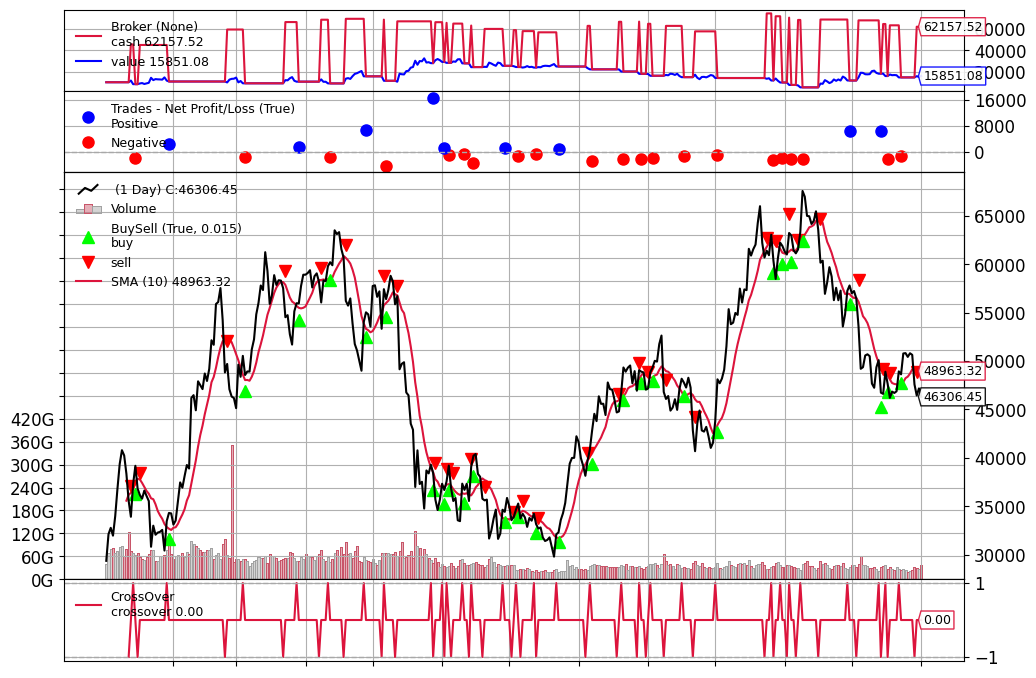

[[<Figure size 1000x700 with 5 Axes>]]

In [50]:
class MMSCruzamento(bt.Strategy):
    def __init__(self):
        self.mms = bt.ind.SMA(self.data.close, period=10)
        self.cruzamento = bt.ind.CrossOver(self.data.close, self.mms)

    def next(self):
        if not self.position:
            # Abrir comprado
            if self.cruzamento[0] > 0:
                self.buy()
            # Abrir vendido (short)
            elif self.cruzamento[0] < 0:
                self.sell()
        else:
            # Se estiver posicionado e cruzar pra baixo, fechar comprado e abrir short
            if  self.cruzamento[0] < 0:
                self.sell()  # fecha comprado
                self.sell()  # abre short
            # Se estiver short e cruzar pra cima, fechar short e abrir comprado
            elif self.cruzamento[0] > 0:
                self.buy()   # fecha short
                self.buy()   # abre comprado
cerebro = bt.Cerebro()
cerebro.addstrategy(MMSCruzamento)
cerebro.adddata(data)
cerebro.run()
plt.rcParams['figure.figsize'] = [10,7]
plt.rcParams.update({'font.size':12})
cerebro.plot(iplot=False)

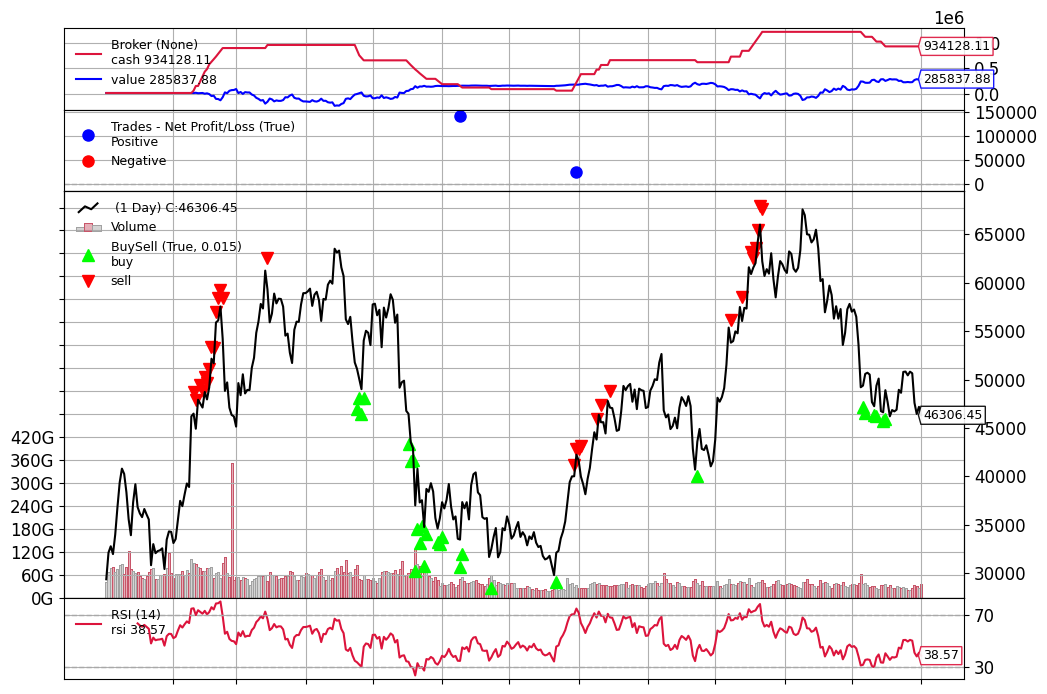

[[<Figure size 1000x700 with 5 Axes>]]

In [48]:
class rsi(bt.Strategy):
  def __init__(self):
    self.rsi = bt.ind.RSI(self.data.close, period=14)
  def next(self):
    if not self.position:
      if self.rsi < 35:
        self.buy(size=1) #Compra caso o RSI romper 35
      else:
        if self.rsi > 70: #Vende caso o RSI romper 70
          self.sell(size=1)
    else:
      if self.rsi < 35:
        if self.broker.getvalue()<0: #Se o saldo em conta for negativo, fecha a ponta Short e abre a ponta Long
          self.buy(size=1)
          self.buy(size=1)
        else:
          self.buy(size=1)
      else:
        if self.rsi > 70:
          if self.broker.getvalue()>0: #Se o saldo em conta for positivo, fecha a ponta Long e abre a ponta Short
            self.sell(size=1)
            self.sell(size=1)
          else:
            self.sell(size=1)
cerebro = bt.Cerebro()
cerebro .addstrategy(rsi)
cerebro.adddata(data)
cerebro.run()
plt.rcParams['figure.figsize'] = [10,7]
plt.rcParams.update({'font.size':12})
cerebro.plot(iplot=False)